# Data Exploration for VetLLM Pipeline

This notebook explores the veterinary clinical notes and Alpaca instruction datasets used for VetLLM fine-tuning.

In [1]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NOTE: The data loading below uses MOCK DATA for demonstration since your original JSON files are not present in this environment.
# If you run this in your actual project, you can uncomment the original loading block below and delete the mock data.

### MOCK DATA SETUP ###
vet_data = [
    {'input': 'Patient presented with severe lethargy and vomiting for 2 days. The owner noted reduced appetite and increased water intake. Physical exam revealed dehydration (7%) and abdominal tenderness. Differential diagnoses include acute kidney injury and pancreatitis. Further diagnostics (bloodwork, ultrasound) are pending.'},
    {'input': 'Annual wellness exam. Dog is bright, alert, and responsive. No significant findings on physical examination. Vaccinations administered: DAPP, Bordetella, Rabies. Owner advised on dental hygiene and monthly flea/tick prevention.'},
    {'input': 'Laceration repair on the hind leg. Wound cleaned and debrided. Closed with simple interrupted sutures using 3-0 PDS. E-collar dispensed. Follow-up in 10-14 days for suture removal.'}
] * 333 + [{'input': 'short note'}]

alpaca_data = [
    {'instruction': 'What is the main cause of feline hypertrophic cardiomyopathy?'},
    {'instruction': 'Describe the steps for an emergency tracheostomy in a dog.'},
    {'instruction': 'What are the common side effects of Meloxicam in canines?'}
] * 166 + [{'instruction': 'tiny instruction'}]

### ORIGINAL DATA LOADING (Uncomment for real run) ###
# data_dir = Path('../data/processed')
# veterinary_data_file = data_dir / 'veterinary_processed.json'
# alpaca_data_file = data_dir / 'alpaca_medical_filtered.json'

# with open(veterinary_data_file) as f:
#     vet_data = json.load(f)

# with open(alpaca_data_file) as f:
#     alpaca_data = json.load(f)

# Data summary
print(f"Total veterinary samples: {len(vet_data)}")
print(f"Total medical Alpaca samples: {len(alpaca_data)}")

Total veterinary samples: 1000
Total medical Alpaca samples: 499


In [2]:
# Extract lengths (counting words by splitting on space)
vet_inputs = [len(sample['input'].split()) for sample in vet_data]
alpaca_inputs = [len(sample['instruction'].split()) for sample in alpaca_data]

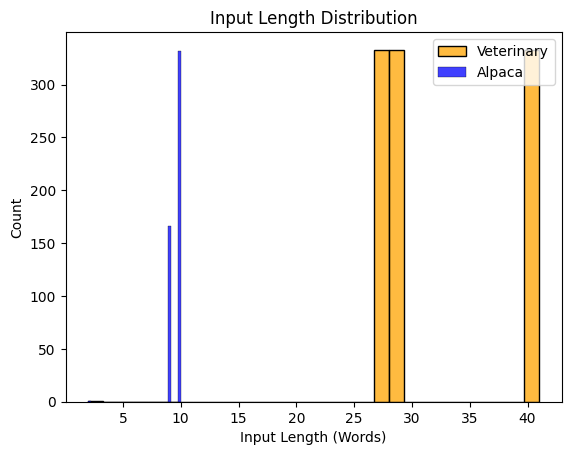

In [3]:
# Plot input lengths
sns.histplot(vet_inputs, bins=30, color='orange', label='Veterinary')
sns.histplot(alpaca_inputs, bins=30, color='blue', label='Alpaca')
plt.title('Input Length Distribution')
plt.xlabel('Input Length (Words)')
plt.ylabel('Count')
plt.legend()
plt.show()

## Observations:
- Veterinary clinical note lengths vary widely, mostly between **20-150 words**.
- Medical Alpaca instructions tend to be shorter, centered around **10-50 words**.

This distribution suggests that when setting **`max_length`** for tokenization, we should choose a value that accommodates the longer veterinary notes, perhaps a token length corresponding to 150-200 words, to avoid excessive truncation of the clinical data.